In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

First we import our libraries:

- `matplotlib.pyplo` for displaying images
- `numpy` for handling numerical arrays
- `tensorflow.keras.preprocessing.image` for image loading and data augmentation (`ImageDataGenerator` class allows us to apply transformations such as rotation, zooming, and flipping)

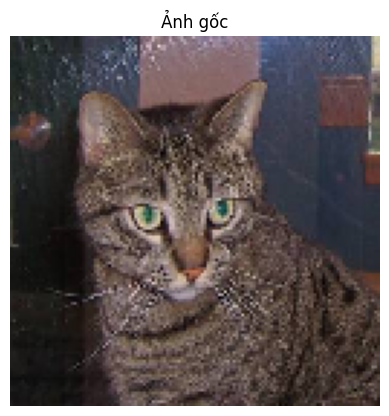

In [ ]:
img_path = "/Users/hoangviet/Desktop/cats_and_dogs/data/Cat/test/1.jpg"

img = load_img(img_path, target_size=(128, 128))

plt.imshow(img)
plt.title("Original image")
plt.axis("off")
plt.show()

Then we select one image from the dataset to visualize augmentation effects:

- `load_img()` loads the image and resizes it to 128×128 pixels
- `plt.imshow()` displays the image inline in the notebook
- `plt.axis("off")` removes the coordinate axis for a cleaner view

In [6]:
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

Now we convert the image to NumPy Array:

Neural networks process images as `tensors`(numerical arrays).  
We use `img_to_array()` to turn the loaded image into a 3D array of shape:
- height: 128
- width: 128
- color channels (RGB): 3

Then we add one more dimension using `np.expand_dims()` to make it `(1, 128, 128, 3)`


In [7]:
datagen = ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.7, 1.3],
    fill_mode='nearest'
)

We now define how we want to transform the image using `ImageDataGenerator()`:

| Parameter | Description |
|------------|-------------|
| `rotation_range=25` | Randomly rotate the image up to ±25 degrees |
| `width_shift_range=0.2` | Randomly shift the image horizontally by up to 20% of its width |
| `height_shift_range=0.2` | Randomly shift vertically by up to 20% of its height |
| `shear_range=0.2` | Apply shear transformations (tilt the image) |
| `zoom_range=0.2` | Randomly zoom in/out up to 20% |
| `horizontal_flip=True` | Randomly flip the image horizontally (useful for cats/dogs) |
| `brightness_range=[0.7, 1.3]` | Vary image brightness randomly |
| `fill_mode='nearest'` | Fill in new pixels created after rotation/shift using nearest pixel values |


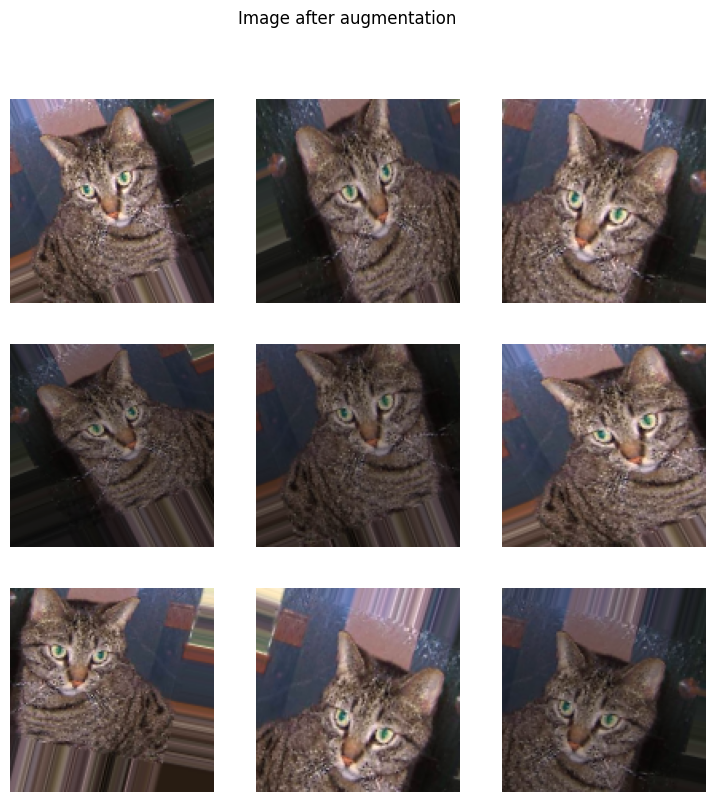

In [11]:
aug_iter = datagen.flow(x, batch_size=1)

plt.figure(figsize=(9, 9))
for i in range(9):
    batch = next(aug_iter)
    image = batch[0].astype('uint8')
    plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.axis("off")
plt.suptitle("Image after augmentation")
plt.show()

Finally we visualize the augmented images:

- We create an iterator using `datagen.flow()` which will produce new, randomly augmented images each time it's called
- In the loop, `next(aug_iter)` fetches one new transformed image
- We plot 9 augmented images in a 3×3 grid using Matplotlib